# The Complete Game: Once Normal, Now Novel

## What We're Looking For
The modern professional baseball player comes from a different planet than did their old-timey, horse-and-buggy forebears. Today's game is faster, higher-scoring, and split-second timed. Most players' skill sets and repertoire are specialized and weaponized so as to befuddle, speed past, and overpower the suckers wearing the other-colored caps.

This is undisputed.

Also undisputed is that the "professional" baseball player of ~150 years ago was not a full-time, this-is-all-I-do professional. For its first few decades, baseball was a seasonal job played before crowds of maybe a few hundred spectators for the biggest games. 

And owing to the vocation's part-time nature, almost nobody crafted their game with a specialized approach — beyond some penchant, preference, or aptitude for one position or another.

Of all the positions on the diamond, the starting pitcher's role has changed the most.

Relief pitchers weren't really a structured part of the game in its fledgling years. The starting pitcher was the pitcher, and the pitcher usually pitched the entire game.

So what changed?

We'll need Pandas, Numpy, and pybaseball.

In [84]:
import pybaseball as pb
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import scipy.stats as stats
import matplotlib.pyplot as plt
import glob

pb.cache.enable()

In [85]:
list_of_data = glob.glob('../../_data/lahman/core/Pitching*.csv')
list_of_dfs = [pd.read_csv(filename) for filename in list_of_data]

In [86]:
# zip loops through TWO THINGS AT ONCE
# so you're looking at dataframe #1 and filename #1
# then dataframe #2 and filename #2
# etc
# and assigning that filename as a new column in the dataframe
for dataframe, filename in zip(list_of_dfs, list_of_data):
  dataframe['filename'] = filename

In [87]:
combined_df = pd.concat(list_of_dfs, ignore_index=True)

In [88]:
combined_df.columns

Index(['playerID', 'yearID', 'round', 'teamID', 'lgID', 'W', 'L', 'G', 'GS',
       'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP',
       'filename', 'stint'],
      dtype='object')

In [89]:
df = combined_df[combined_df.CG.notnull()]

In [90]:
df_postseason = df.dropna()

In [154]:
df

,playerID,yearID,round,teamID,lgID,W,L,G,GS,CG,...,HBP,BK,BFP,GF,R,SH,SF,GIDP,filename,stint
0,becanbu01,1884,WS,NY4,AA,0,1,1,1,1,...,NaN,NaN,NaN,0,12,NaN,NaN,NaN,../../_data/lahman/core/PitchingPost.csv,NaN
1,keefeti01,1884,WS,NY4,AA,0,2,2,2,2,...,NaN,NaN,NaN,0,9,NaN,NaN,NaN,../../_data/lahman/core/PitchingPost.csv,NaN
2,radboch01,1884,WS,PRO,NL,3,0,3,3,3,...,NaN,NaN,NaN,0,3,NaN,NaN,NaN,../../_data/lahman/core/PitchingPost.csv,NaN
3,carutbo01,1885,WS,SL4,AA,1,1,3,3,3,...,NaN,NaN,NaN,0,18,NaN,NaN,NaN,../../_data/lahman/core/PitchingPost.csv,NaN
4,clarkjo01,1885,WS,CHN,NL,0,1,2,2,2,...,NaN,NaN,NaN,0,14,NaN,NaN,NaN,../../_data/lahman/core/PitchingPost.csv,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55733,zeuchtj01,2021,NaN,TOR,AL,0,2,5,3,0,...,0.0,0.0,74.0,0,16,0.0,0.0,2.0,../../_data/lahman/core/Pitching.csv,1.0
55734,zimmebr02,2021,NaN,BAL,AL,4,5,14,13,0,...,2.0,1.0,285.0,0,37,1.0,2.0,3.0,../../_data/lahman/core/Pitching.csv,1.0
55735,zimmejo02,2021,NaN,MIL,NL,0,0,2,0,0,...,1.0,0.0,26.0,1,5,0.0,0.0,1.0,../../_data/lahman/core/Pitching.csv,1.0
55736,zimmeky01,2021,NaN,KCA,AL,4,1,52,2,0,...,0.0,0.0,223.0,9,32,0.0,4.0,13.0,../../_data/lahman/core/Pitching.csv,1.0


In [155]:
season_decades = df
season_decades = season_decades.groupby((season_decades.yearID//10)*10).CG.mean()
df_decades = pd.DataFrame(season_decades)

In [156]:
df_decades.head(10)

,CG
yearID,
1870,16.047210
1880,14.353913
1890,12.490347
1900,10.956681
1910,6.261317
1920,5.377078
1930,4.786985
1940,4.080800
1950,3.018116


In [157]:
df_decades['cg_total'] = df.groupby((df.yearID//10)*10).CG.sum()
df_decades['p_mean'] = df.groupby((df.yearID//10)*10).playerID.count() / 10
df_decades['total_pitchers'] = df.groupby((df.yearID//10)*10).playerID.count()
df_decades['League Batting Average'] = df.groupby((df.yearID//10)*10).BAOpp.median()
df_decades['median_era'] = df.groupby((df.yearID//10)*10).ERA.median()

In [158]:
df_decades.drop(index=2020)

,CG,cg_total,p_mean,total_pitchers,League Batting Average,median_era
yearID,,,,,,
1870,16.047210,3739,23.3,233,NaN,3.050
1880,14.353913,16507,115.0,1150,NaN,3.805
1890,12.490347,16175,129.5,1295,NaN,4.500
1900,10.956681,17958,163.9,1639,0.2305,3.000
1910,6.261317,15215,243.0,2430,0.2600,3.170
1920,5.377078,12292,228.6,2286,0.2900,4.320
1930,4.786985,11034,230.5,2305,0.2800,4.500
1940,4.080800,10606,259.9,2599,0.2600,3.990
1950,3.018116,8330,276.0,2760,0.2600,4.165


In [159]:
df_decades.to_csv('cgtrends.csv')

In [62]:
post_decades = df_postseason
post_decades = post_decades.groupby((post_decades.yearID//10)*10).CG.mean()
post_decades

yearID
1900    1.040000
1910    0.768421
1920    0.479675
1930    0.421875
1940    0.346939
1950    0.256410
1960    0.259459
1970    0.113586
1980    0.095685
1990    0.035088
2000    0.015613
2010    0.009744
2020    0.000000
Name: CG, dtype: float64

In [135]:
cg = pd.DataFrame(df.groupby('yearID').CG.describe())

In [139]:
cg.to_csv('cg_describe.csv')

In [34]:
# group pitcher data into per-year dicts, throw to list
year_groups = df.groupby(['yearID']).apply(
    lambda x: [
        list(x['teamID']), 
        list(x['CG']), 
        list(x['IPouts']), 
        list(x['BFP']), 
        list(x['BAOpp']), 
        list(x['BB']), 
        list(x['SO']), 
        list(x['ERA'])
        ]
    ).apply(pd.Series)
year_groups.columns = ['team_ID', 'CG', 'IP_Outs', 'BFP', 'Opp_BA', 'BB', 'SO', 'ERA']
year_groups = year_groups.reset_index()

In [35]:
year = 1871
season_list = []
for counter, _ in enumerate(range(1871, 2021)):
    season = year_groups['yearID']
    season = {}
    season['year'] = year_groups['yearID'][counter]

    season['CG_max'] = max(year_groups['CG'][counter])
    season['CG_min'] = min(year_groups['CG'][counter])
    season['CG_mean'] = stats.mean(year_groups['CG'][counter])
    season['CG_median'] = stats.median(year_groups['CG'][counter])
    season['CG_var'] = stats.variance(year_groups['CG'][counter])

    season['IP_outs_max'] = max(year_groups['IP_Outs'][counter])
    season['IP_outs_min'] = min(year_groups['IP_Outs'][counter])
    season['IP_outs_mean'] = stats.mean(year_groups['IP_Outs'][counter])
    season['IP_outs_median'] = stats.median(year_groups['IP_Outs'][counter])
    season['IP_outs_var'] = stats.variance(year_groups['IP_Outs'][counter])

    season['batters_faced_max'] = max(year_groups['BFP'][counter])
    season['batters_faced_min'] = min(year_groups['BFP'][counter])
    season['batters_faced_mean'] = stats.mean(year_groups['BFP'][counter])
    season['batters_faced_median'] = stats.median(year_groups['BFP'][counter])
    # season['batters_faced_var'] = stats.variance(year_groups['BFP'][counter])

    season['Opp_BA_max'] = max(year_groups['Opp_BA'][counter])
    season['Opp_BA_min'] = min(year_groups['Opp_BA'][counter])
    season['Opp_BA_mean'] = stats.mean(year_groups['Opp_BA'][counter])
    season['Opp_BA_median'] = stats.median(year_groups['Opp_BA'][counter])
    # season['Opp_BA_var'] = stats.variance(year_groups['Opp_BA'][counter])

    season['BB_max'] = max(year_groups['BB'][counter])
    season['BB_min'] = min(year_groups['BB'][counter])
    season['BB_mean'] = stats.mean(year_groups['BB'][counter])
    season['BB_median'] = stats.median(year_groups['BB'][counter])
    season['BB_var'] = stats.variance(year_groups['BB'][counter])

    season['SO_max'] = max(year_groups['SO'][counter])
    season['SO_min'] = min(year_groups['SO'][counter])
    season['SO_mean'] = stats.mean(year_groups['SO'][counter])
    season['SO_median'] = stats.median(year_groups['SO'][counter])
    season['SO_var'] = stats.variance(year_groups['SO'][counter])

    season['ERA_max'] = max(year_groups['ERA'][counter])
    season['ERA_min'] = min(year_groups['ERA'][counter])
    season['ERA_mean'] = stats.mean(year_groups['ERA'][counter])
    season['ERA_median'] = stats.median(year_groups['ERA'][counter])
    # season['ERA_var'] = stats.variance(year_groups['ERA'][counter])
    season_list.append(season)
    

In [36]:
def unique(list):
    x = np.array(list)
    return (np.unique(x)).tolist()

In [37]:
year = 1871
counter = 0
decade_list = [(year // 10) * 10 for year in range(1871, 2021)]
decade_list = unique(decade_list)


In [38]:
len(decade_list)

16

In [39]:
year = 1871
decade_groups = []
for counter, year in enumerate(range(1871, 2021)):
    decade_flag = (year // 10) * 10

    season = year_groups["yearID"]
    season = {}
    season["year"] = year_groups["yearID"][counter]

    season["CG_max"] = max(year_groups["CG"][counter])
    season["CG_min"] = min(year_groups["CG"][counter])
    season["CG_mean"] = stats.mean(year_groups["CG"][counter])
    season["CG_median"] = stats.median(year_groups["CG"][counter])

    season["IP_outs_max"] = max(year_groups["IP_Outs"][counter])
    season["IP_outs_min"] = min(year_groups["IP_Outs"][counter])
    season["IP_outs_mean"] = stats.mean(year_groups["IP_Outs"][counter])
    season["IP_outs_median"] = stats.median(year_groups["IP_Outs"][counter])

    season["batters_faced_max"] = max(year_groups["BFP"][counter])
    season["batters_faced_min"] = min(year_groups["BFP"][counter])
    season["batters_faced_mean"] = stats.mean(year_groups["BFP"][counter])
    season["batters_faced_median"] = stats.median(year_groups["BFP"][counter])
    # season['batters_faced_var'] = stats.variance(year_groups['BFP'][counter])

    season["Opp_BA_mean"] = stats.mean(year_groups["Opp_BA"][counter])
    season["Opp_BA_median"] = stats.median(year_groups["Opp_BA"][counter])
    # season['Opp_BA_var'] = stats.variance(year_groups['Opp_BA'][counter])

    season["BB_max"] = max(year_groups["BB"][counter])
    season["BB_mean"] = stats.mean(year_groups["BB"][counter])
    season["BB_median"] = stats.median(year_groups["BB"][counter])

    season["SO_max"] = max(year_groups["SO"][counter])
    season["SO_min"] = min(year_groups["SO"][counter])
    season["SO_mean"] = stats.mean(year_groups["SO"][counter])
    season["SO_median"] = stats.median(year_groups["SO"][counter])

    season["ERA_mean"] = stats.mean(year_groups["ERA"][counter])
    season["ERA_median"] = stats.median(year_groups["ERA"][counter])
    # season['ERA_var'] = stats.variance(year_groups['ERA'][counter])
    season_list.append(season)

In [40]:
df = pd.DataFrame(season_list)
df.to_csv('by_season.csv')

In [51]:
df_decades = df
df_decades = df_decades.groupby((df_decades.yearID//10)*10).CG.mean()
df_decades

yearID
1870    16.047210
1880    14.353913
1890    12.490347
1900    10.956681
1910     6.261317
1920     5.377078
1930     4.786985
1940     4.080800
1950     3.018116
1960     2.361808
1970     2.372208
1980     1.321495
1990     0.500850
2000     0.214556
2010     0.110890
2020     0.034184
Name: CG, dtype: float64

In [42]:
df_decades.to_csv('by_decade.csv')

In [44]:
df.columns

Index(['year', 'CG_max', 'CG_min', 'CG_mean', 'CG_median', 'CG_var',
       'IP_outs_max', 'IP_outs_min', 'IP_outs_mean', 'IP_outs_median',
       'IP_outs_var', 'batters_faced_max', 'batters_faced_min',
       'batters_faced_mean', 'batters_faced_median', 'Opp_BA_max',
       'Opp_BA_min', 'Opp_BA_mean', 'Opp_BA_median', 'BB_max', 'BB_min',
       'BB_mean', 'BB_median', 'BB_var', 'SO_max', 'SO_min', 'SO_mean',
       'SO_median', 'SO_var', 'ERA_max', 'ERA_min', 'ERA_mean', 'ERA_median'],
      dtype='object')

<AxesSubplot:xlabel='year', ylabel='CG_mean'>

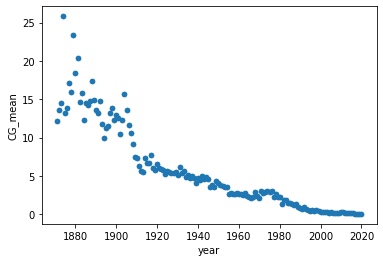

In [57]:
df.plot.scatter(y='CG_mean', x='year')

In [66]:
zscores = stats.zscore(df.CG_mean).to_list()

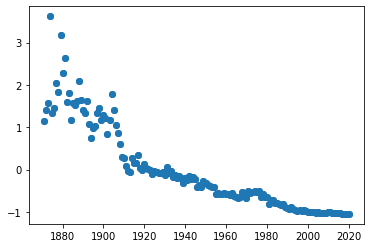

In [70]:
plot.scatter(x=df.year, y=zscores)

In [74]:
df.CG_median.describe()

count    300.000000
mean       2.386667
std        3.316699
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       17.000000
Name: CG_median, dtype: float64

year                      int64
CG_max                    int64
CG_min                    int64
CG_mean                 float64
CG_median               float64
CG_var                  float64
IP_outs_max               int64
IP_outs_min               int64
IP_outs_mean            float64
IP_outs_median          float64
IP_outs_var             float64
batters_faced_max       float64
batters_faced_min       float64
batters_faced_mean      float64
batters_faced_median    float64
Opp_BA_max              float64
Opp_BA_min              float64
Opp_BA_mean             float64
Opp_BA_median           float64
BB_max                    int64
BB_min                  float64
BB_mean                 float64
BB_median               float64
BB_var                  float64
SO_max                    int64
SO_min                    int64
SO_mean                 float64
SO_median               float64
SO_var                  float64
ERA_max                 float64
ERA_min                 float64
ERA_mean